In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
bike_data_raw = pd.read_csv('daily-bike-share.csv')

In [25]:
bike_data_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [26]:
bike_data_raw['dteday'] = pd.to_datetime(bike_data_raw['dteday'])
bike_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


In [27]:
bike_data = bike_data_raw.copy()
bike_data['difference_temp'] = (bike_data['atemp'] - bike_data['temp'])/bike_data['temp']
bike_data.drop(['instant', 'dteday', 'yr', 'atemp'], axis=1, inplace=True)
bike_data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals,difference_temp
0,1,1,0,6,0,2,0.344167,0.805833,0.160446,331,0.056537
1,1,1,0,0,0,2,0.363478,0.696087,0.248539,131,-0.026794
2,1,1,0,1,1,1,0.196364,0.437273,0.248309,120,-0.035439
3,1,1,0,2,1,1,0.200000,0.590435,0.160296,108,0.060610
4,1,1,0,3,1,1,0.226957,0.436957,0.186900,82,0.010191


In [28]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
target = 'rentals'

### Create model

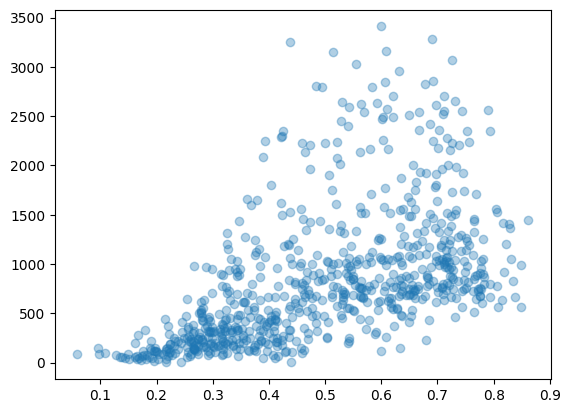

In [38]:
X = bike_data[['temp']].copy()
y = bike_data[target].copy()
plt.scatter(X, y, alpha=0.35)
plt.show()

#### Create training and test dataset

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print(f"X.shape: {X.shape}, y.shape: {y.shape}")
print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

X.shape: (731, 1), y.shape: (731,)
X_train.shape: (584, 1), y_train.shape: (584,)
X_test.shape: (147, 1), y_test.shape: (147,)


#### Initialize model

In [46]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f"{lr_model.intercept_}")
print(f"{lr_model.coef_}")

-179.96286312537404
[1990.31869846]


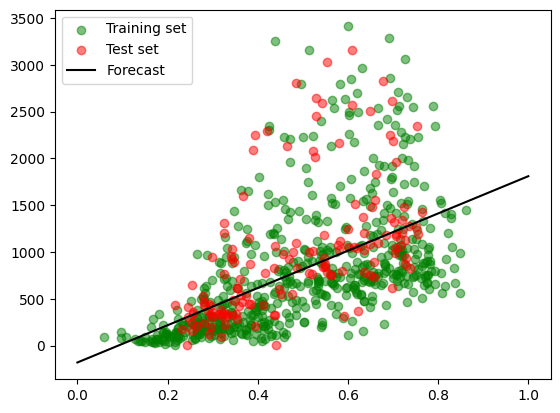

In [49]:
import numpy as np
X_linspace = np.linspace(0, 1, 100)
y_fitted = lr_model.intercept_ + lr_model.coef_ * X_linspace

plt.scatter(X_train, y_train, color='green', alpha=0.5, label="Training set")
plt.scatter(X_test, y_test, color='red', alpha=0.5, label="Test set")
plt.plot(X_linspace, y_fitted, color='black', label="Forecast")
plt.legend(loc="upper left")
plt.show()